<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (
    f1_score, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score
)
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

## Подготовка данных

Загружаем файлы, проверяем информацию

In [2]:
train_data = pd.read_csv('~/ya_praktikum_projects/datasets/P4_ml_recovery_gold/gold_recovery_train_new.csv')
test_data = pd.read_csv('~/ya_praktikum_projects/datasets/P4_ml_recovery_gold/gold_recovery_test_new.csv')
full_data = pd.read_csv('~/ya_praktikum_projects/datasets/P4_ml_recovery_gold/gold_recovery_full_new.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Расчитаем эффективность обогащения на этапе флотации по формуле для дальнейшей проверки адекватности данных:

In [6]:
r_o_r = (train_data[
    'rougher.output.concentrate_au'
] * (train_data[
    'rougher.input.feed_au'
] - train_data[
    'rougher.output.tail_au'
])) / (train_data[
    'rougher.input.feed_au'
] * (train_data[
    'rougher.output.concentrate_au'
] - train_data[
    'rougher.output.tail_au'
])) * 100
r_o_r

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

Найдем среднее абсолютное отклонение найденых по формуле значений с табличными:

In [7]:
mae_ror = abs(r_o_r - train_data['rougher.output.recovery']).sum() / len(r_o_r)
mae_ror

9.73512347450521e-15

Учитывая значение MAE, данные в таблице верные

Найдем признаки, отсутсвующие в тестовом наборе данных:

In [8]:
full_data.columns[full_data.columns.isin(test_data.columns) == False]

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [9]:
full_data[full_data.columns[full_data.columns.isin(test_data.columns) == False]].sample(5)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
17489,5.238749,9.796042,10.268748,43.876343,80.711151,10.896707,3.322004,11.373861,2.491600,9.822758,...,18.525376,96.730099,2.828336,0.463276,18.981311,0.750051,17.455088,9.159773,6.046946,4.402800
14789,6.062219,10.098855,10.829058,44.501079,74.997508,11.965909,2.249114,13.436907,2.873596,10.559323,...,19.466866,91.509006,5.275111,0.531383,21.570859,1.493498,19.420469,6.355987,6.873725,3.803657
13324,4.109047,8.763177,7.106011,38.236071,71.665672,7.990674,2.860532,12.185374,2.937151,8.277421,...,20.981609,86.591942,3.981754,0.718140,19.474367,1.813338,16.526277,8.138779,3.167978,5.914293
934,6.419775,13.044901,13.372392,38.651951,75.107682,12.929187,2.492147,11.134373,3.029732,11.329958,...,20.291913,91.368197,5.457801,0.318408,11.930569,1.525996,9.953023,3.624625,7.378936,2.269681
8892,5.746098,9.903990,11.145804,45.215087,62.605779,9.099445,2.532067,13.215842,3.013435,9.563547,...,19.695219,85.730459,6.040193,0.758802,23.704123,1.511454,13.232701,2.731391,12.183802,3.032739


Эти данные рассчитываются позже, поэтому отсутствуют в данной выборке. Для проверки работы модели нам понадобятся значения целевых признаков (final.output.recovery и rougher.output.recovery) в тестовой выборке. Добавляем их из полного набора данных.

In [10]:
test_data = test_data.sort_values('date')

test_data.loc[
    :, 'final.output.recovery'
] = full_data.sort_values('date')[full_data['date'].isin(test_data['date'])][
    'final.output.recovery'
].values

test_data.loc[
    :, 'rougher.output.recovery'
] = full_data.sort_values('date')[full_data['date'].isin(test_data['date'])][
    'rougher.output.recovery'
].values

Строим гистограммы признаков:

In [11]:
names = []
for i in range(1, len(full_data.columns)):
    names.append(full_data.columns[i].split('.')[0] + '.' + full_data.columns[i].split('.')[1])

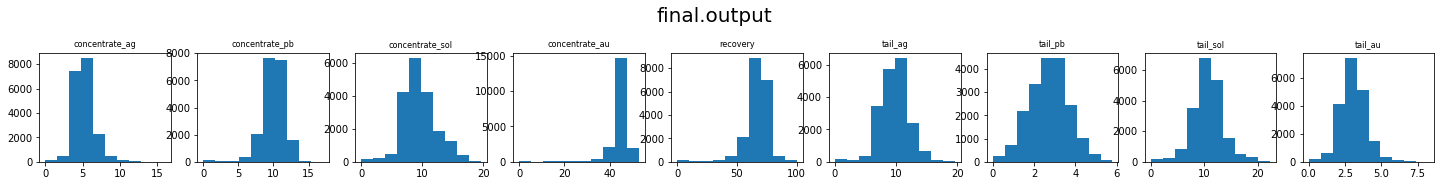

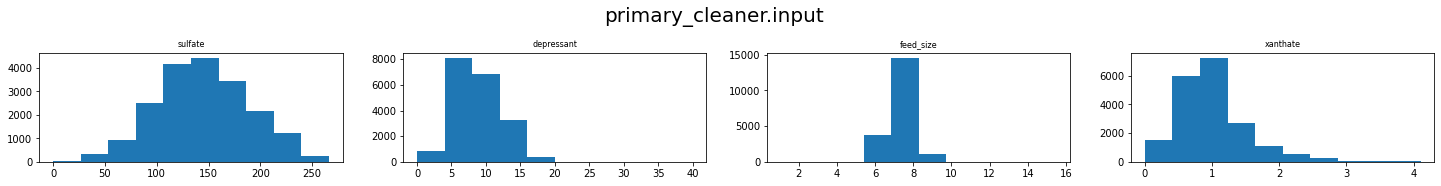

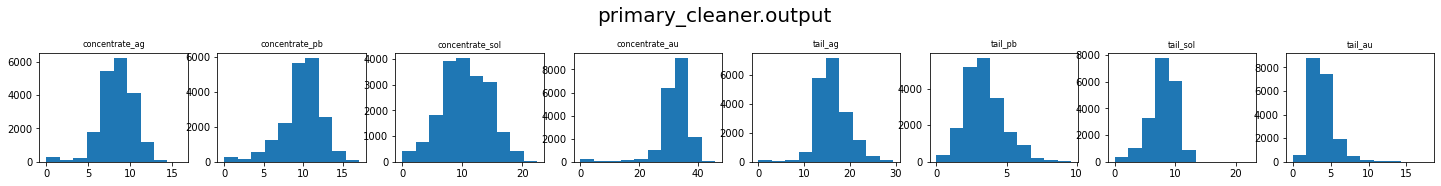

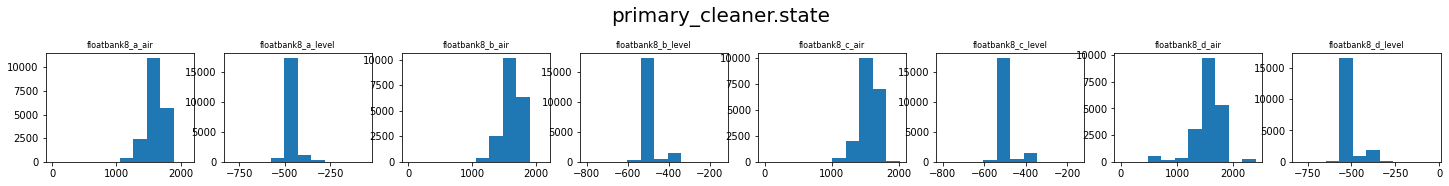

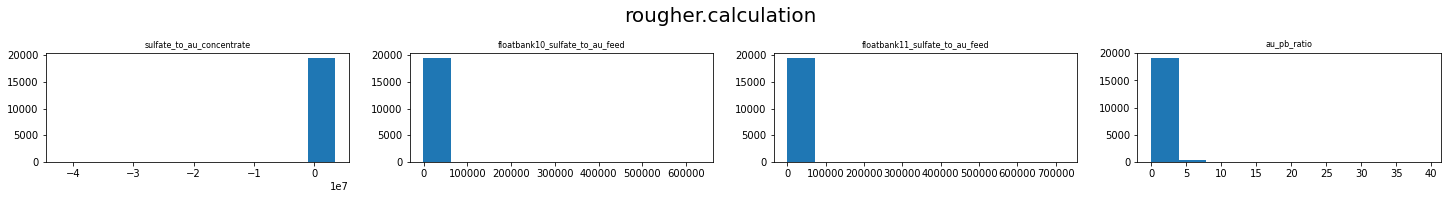

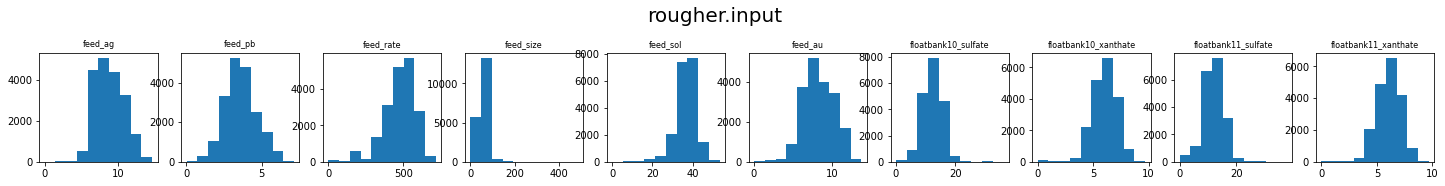

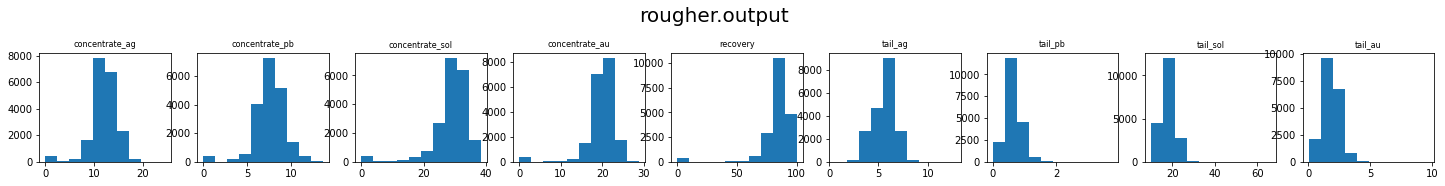

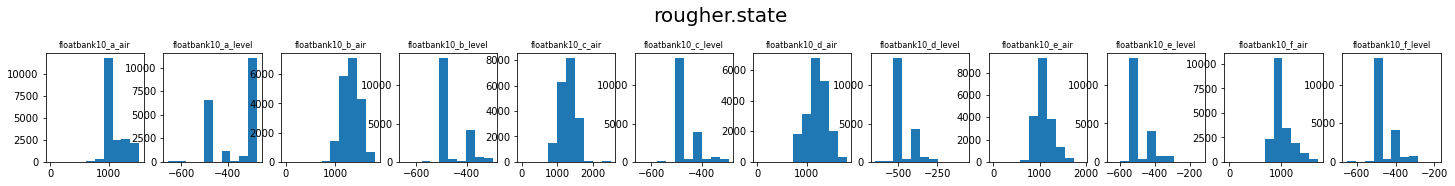

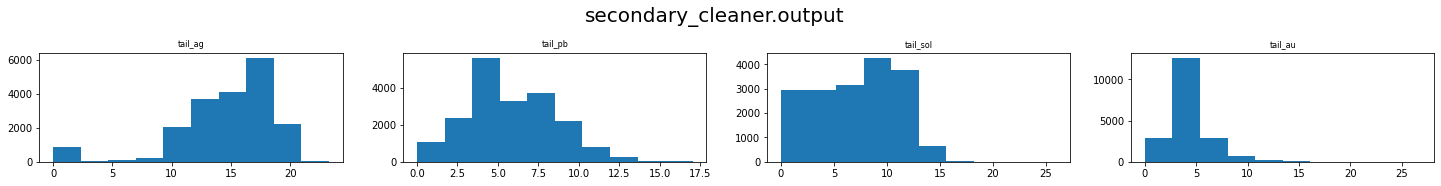

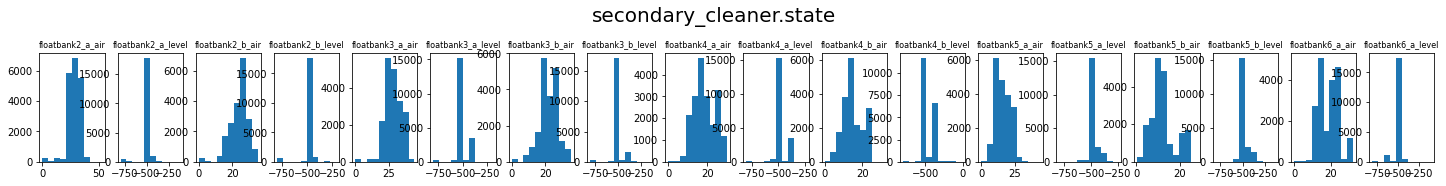

In [12]:
for i in range(len(range(pd.Series(pd.Series(names).unique()).count()))):
    fig, axs = plt.subplots(1, full_data.columns.str.contains(pd.Series(names).unique()[i]).sum(), figsize=(25, 2))
    fig.suptitle(pd.Series(names).unique()[i], fontsize=20, y=1.2)
    for x in range(full_data.columns.str.contains(pd.Series(names).unique()[i]).sum()):
        axs[x].hist(full_data.loc[:, full_data.loc[:, full_data.columns.str.contains(pd.Series(names).unique()[i])].columns[x]])
        axs[x].set_title(full_data.loc[:, full_data.loc[:, full_data.columns.str.contains(pd.Series(names).unique()[i])].columns[x]].name.split('.')[-1], fontsize=8)

Большинство признаков распределены нормально.

Проверим пропущенные значения:

In [13]:
def isna_view (data):
    return (
        (data.isna().mean())
        .sort_values(ascending=False)
        .to_frame()
        .rename(columns = {0:'percent_space'})
        # .style.background_gradient('coolwarm').format("{:.1%}")
    )

In [14]:
isna_view (full_data)

,percent_space
secondary_cleaner.output.tail_sol,9.0%
rougher.input.floatbank11_xanthate,2.3%
rougher.state.floatbank10_e_air,2.2%
primary_cleaner.output.concentrate_sol,1.9%
secondary_cleaner.state.floatbank2_a_air,1.1%
final.output.concentrate_sol,1.1%
rougher.input.feed_size,0.7%
primary_cleaner.output.concentrate_pb,0.6%
primary_cleaner.input.xanthate,0.5%
final.output.tail_pb,0.5%


Заполняем рядом стоящими значениями, так параметры отсортированы по времени, а значения параметров похожи на ближайшие по времени

In [15]:
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')
full_data = full_data.fillna(method='ffill')

In [16]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())
print(full_data.isna().sum().sum())

0
0
0


В ходе подготовки данных, была проверена расчетная величина эффективности обогащения; исследованы отсутсвующие в тестовом наборе данных признаки; построены гистограммы всех признаков; заполнены пропуски в данных.

## Анализ данных

Найдем концентрации металлов на разных этапах обработки и сравним:

In [17]:
output = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_'
]

Средняя концентрация au
Этап: rougher.input.feed_ 8.266097326589103
Этап: rougher.output.concentrate_ 19.772000139486316
Этап: primary_cleaner.output.concentrate_ 32.1194004078765
Этап: final.output.concentrate_ 44.0765129419528


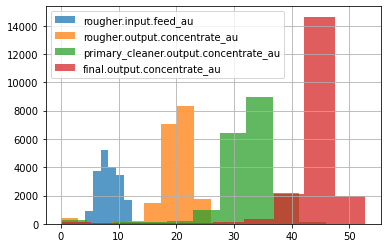

Средняя концентрация ag
Этап: rougher.input.feed_ 8.794927425814688
Этап: rougher.output.concentrate_ 11.994759359873429
Этап: primary_cleaner.output.concentrate_ 8.44240807771906
Этап: final.output.concentrate_ 5.168386967510243


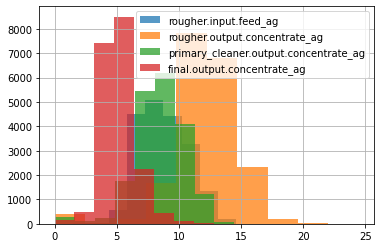

Средняя концентрация pb
Этап: rougher.input.feed_ 3.585095711585748
Этап: rougher.output.concentrate_ 7.606272313195003
Этап: primary_cleaner.output.concentrate_ 9.810316539310149
Этап: final.output.concentrate_ 9.978821384192907


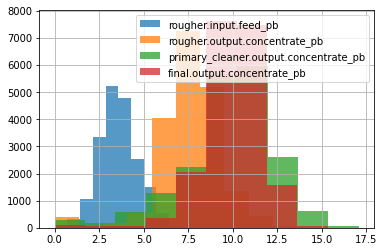

In [18]:
for i in ['au', 'ag', 'pb']:
    print('Средняя концентрация', i,)
    for k in output:
        full_data[k + i].hist(alpha=.75, legend=True)
        print('Этап:', k, full_data[k + i].mean())
    plt.show()

Концентрация золота предсказуемо растет с каждым этапом обработки, концентрация серебра снижается, а концентрация свинца меняется на разных этапах в связи с технологическим процессом обработки. Все величины распределены близко к нормальному.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

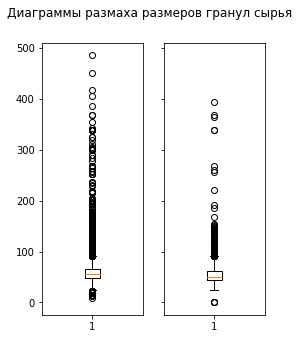

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(4, 5), sharey=True)
fig.suptitle('Диаграммы размаха размеров гранул сырья')
axs[0].boxplot(train_data['rougher.input.feed_size'])
axs[1].boxplot(test_data['rougher.input.feed_size']);

Судя по графику данные распределены похожим образом.

Найдем и исследуем суммарные концентрации веществ:

rougher.input.feed_ mean 57.320789408793196


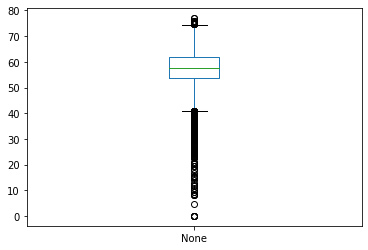

rougher.output.concentrate_ mean 68.17086532768955


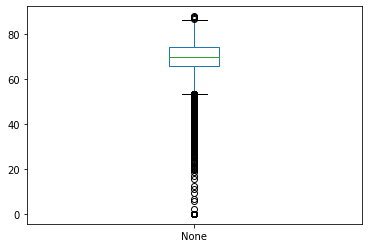

primary_cleaner.output.concentrate_ mean 60.764731421795695


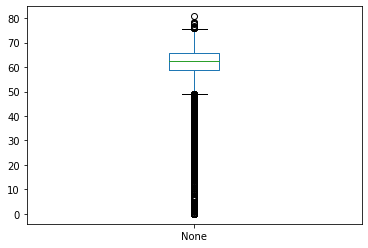

final.output.concentrate_ mean 68.65362374063201


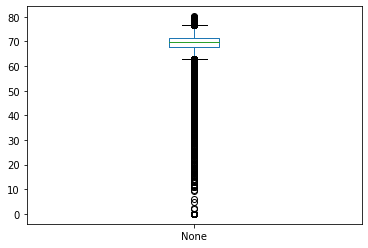

In [20]:
conc_sum = {}
for k in output:
    conc_sum[k] = []
    conc_sum[k].append(
        (full_data[k + 'au'] + full_data[k + 'ag'] + full_data[k + 'pb'] + full_data[k + 'sol'])
    )
    print(k, 'mean', (
        full_data[k + 'au'] + full_data[k + 'ag'] + full_data[k + 'pb'] + full_data[k + 'sol']
    ).mean())
    (
        full_data[k + 'au'] + full_data[k + 'ag'] + full_data[k + 'pb'] + full_data[k + 'sol']
    ).plot(kind='box')
    plt.show()

На диаграммах размаха видно большое количество выбросов, причем с каждым этапом они увеличиваются, а межквантильный размах уменьшается. Удалим данные с нулевой суммарной концентрацией.

In [21]:
train_data.shape

(14149, 87)

In [22]:
for k in output:
    train_data = train_data.where(
        train_data[k + 'au'] +\
        train_data[k + 'ag'] +\
        train_data[k + 'pb'] +\
        train_data[k + 'sol'] != 0
    ).dropna()

In [23]:
train_data.shape

(13725, 87)

Были исследованы распределения концентраций металлов на каждом этапе очистки; проверено сходство распределений размеров гранул сырья в тестовой и обучающей выборках; исследованы суммарные концентрации металлов, найдены аномалии в распределении исследованных величин, устранены эти аномалии.

## Модель

Разбиваем выборки для обучения моделей, выделяем целевые признаки:

In [24]:
features_rougher_train = train_data.loc[
    :, test_data.loc[:, test_data.columns.str.contains('rougher')].columns
].drop(
    ['rougher.output.recovery'], axis=1
)
features_final_train = train_data.loc[
    :, test_data.loc[:, test_data.columns.str.contains('rougher') == False].columns
].drop(
    ['date','final.output.recovery'], axis=1
)
target_rougher_train = train_data['rougher.output.recovery']
target_final_train = train_data['final.output.recovery']
features_rougher_test = test_data.loc[
    :, test_data.loc[:, test_data.columns.str.contains('rougher')].columns
].drop(
    ['rougher.output.recovery'], axis=1
)
features_final_test = test_data.loc[
    :, test_data.loc[:, test_data.columns.str.contains('rougher') == False].columns
].drop(
    ['date','final.output.recovery'], axis=1
)
target_rougher_test = test_data['rougher.output.recovery']
target_final_test = test_data['final.output.recovery']

Функция для поиска метрики sMAPE:

In [25]:
def smape(target, pred):
    return ((2 * abs(target - pred)/(abs(target) + abs(pred))) * 100).sum() / len(target)

Функция для поиска итоговой sMAPE:

In [26]:
def final_smape(smape_rougher, smape_final):
    return smape_rougher * .25 + smape_final * .75

Обучаем модель DecisionTreeRegressor, находим значение гиперпараметра max_depth с лучшим результатом для чернового концентрата:

In [27]:
%%time
max_dep = []
results = []
for depth in range(1, 20):
    rougher_model_tree = DecisionTreeRegressor(random_state=111, max_depth = depth)
    rougher_model_tree.fit(features_rougher_train, target_rougher_train) 
    scores = cross_val_score(rougher_model_tree,
                             features_rougher_train,
                             target_rougher_train,
                             scoring = make_scorer(smape),
                             cv = 5)
    max_dep.append(depth)
    results.append(scores.mean())
res = pd.DataFrame(results, index=max_dep)
res.columns = ['result']
print(res.query('result == @res["result"].min()'))
smape_rougher_tree = res.query('result == @res["result"].min()')

    result
4  7.02683
CPU times: user 21.9 s, sys: 75.6 ms, total: 22 s
Wall time: 22.2 s


Обучаем модель DecisionTreeRegressor, находим значение гиперпараметра max_depth с лучшим результатом для итоговой очистки:

In [28]:
%%time
max_dep = []
results = []
for depth in range(1, 20):
    final_model_tree = DecisionTreeRegressor(random_state=111, max_depth = depth)
    final_model_tree.fit(features_final_train, target_final_train) 
    scores = cross_val_score(final_model_tree,
                             features_final_train,
                             target_final_train,
                             scoring = make_scorer(smape),
                             cv = 5)
    max_dep.append(depth)
    results.append(scores.mean())
res = pd.DataFrame(results, index=max_dep)
res.columns = ['result']
print(res.query('result == @res["result"].min()'))
smape_final_tree = res.query('result == @res["result"].min()')

      result
1  10.105908
CPU times: user 30.3 s, sys: 30.7 ms, total: 30.3 s
Wall time: 30.6 s


Итоговая sMAPE:

In [29]:
final_smape(smape_rougher_tree.values, smape_final_tree.values)

array([[9.33613862]])

Обучаем модель RandomForestRegressor, находим значение гиперпараметра max_depth с лучшим результатом для чернового концентрата:

In [30]:
%%time
n_est = []
dep = []
results = []
for est in range(119, 121):
    for depth in range(19, 21):
        rougher_model_for = RandomForestRegressor(random_state=111, max_depth=depth, n_estimators=est)
        rougher_model_tree.fit(features_rougher_train, target_rougher_train) 
        smape_rougher_for = cross_val_score(
            rougher_model_for,  
            features_rougher_train, 
            target_rougher_train, 
            scoring = make_scorer(smape),
            cv = 5
        )
        dep.append(depth)
        n_est.append(est)
        results.append(smape_rougher_for.mean())


CPU times: user 6min 51s, sys: 1.37 s, total: 6min 52s
Wall time: 6min 53s


In [32]:
res = pd.DataFrame(dep, n_est)
res.columns = ['max_depth']
res['results'] = results
res.sort_values('results').head(10)

,max_depth,results
119,19,6.783000
120,19,6.783745
119,20,6.790700
120,20,6.793873


Обучаем модель RandomForestRegressor, находим значение гиперпараметра max_depth с лучшим результатом для итоговой очистки:

In [33]:
%%time
n_est = []
dep = []
results = []
for est in range(70, 71):
    for depth in range(1, 5):
        final_model_for = RandomForestRegressor(random_state=111, max_depth=depth, n_estimators=est)
        final_model_tree.fit(features_final_train, target_final_train) 
        smape_final_for = cross_val_score(
            final_model_for,  
            features_final_train, 
            target_final_train, 
            scoring = make_scorer(smape),
            cv = 5
        )
        dep.append(depth)
        n_est.append(est)
        results.append(smape_final_for.mean())


CPU times: user 1min 9s, sys: 260 ms, total: 1min 9s
Wall time: 1min 9s


In [34]:
res = pd.DataFrame(dep, n_est)
res.columns = ['max_depth']
res['results'] = results
res.sort_values('results').head(10)

,max_depth,results
70,1,9.957452
70,2,10.059994
70,3,10.634679
70,4,11.524895


Итоговая sMAPE:

In [35]:
final_smape(6.783000, 9.957452)

9.163839

Обучаем модель линейной регрессии, находим sMAPE на каждом этапе и итоговую sMAPE:

In [36]:
rougher_model_lin = LinearRegression()
smape_rougher_lin = cross_val_score(
    rougher_model_lin,  
    features_rougher_train, 
    target_rougher_train, 
    scoring = make_scorer(smape),
    cv = 5
).mean()
smape_rougher_lin

6.677118661212704

In [37]:
final_model_lin = LinearRegression()
smape_final_lin = cross_val_score(
    final_model_lin,  
    features_final_train, 
    target_final_train, 
    scoring = make_scorer(smape),
    cv = 5
).mean()
smape_final_lin

9.743932629320536

In [38]:
final_smape(smape_rougher_lin, smape_final_lin)

8.977229137293579

Лучший результат показала модель LinearRegression. Проведем ее тестирование:

In [39]:
rougher_model = LinearRegression()
rougher_model.fit(features_rougher_train, target_rougher_train)
rougher_predict = rougher_model.predict(features_rougher_test)
smape_rougher = smape(target_rougher_test, rougher_predict)
smape_rougher

8.186021907563676

In [40]:
final_model = LinearRegression()
final_model.fit(features_final_train, target_final_train)
final_predict = final_model.predict(features_final_test)
smape_final = smape(target_final_test, final_predict)
smape_final

9.68605533917814

In [41]:
final_smape(smape_rougher, smape_final)

9.311046981274524

Результат на тестовой выборке: sMAPE = 9.311

Проверяем модель на адекватность: создаем константную модель со средними значениями:

In [34]:
dum_reg = DummyRegressor(strategy="mean")
dum_reg.fit(features_rougher_train, target_rougher_train)
rougher_mean_predict = dum_reg.predict(features_rougher_test)
smape_rougher_mean = smape(target_rougher_test, rougher_mean_predict)
smape_rougher_mean

9.06436059215427

In [35]:
dum_reg = DummyRegressor(strategy="mean")
dum_reg.fit(features_final_train, target_final_train)
final_mean_predict = dum_reg.predict(features_final_test)
smape_final_mean = smape(target_final_test, final_mean_predict)
smape_final_mean

10.086634972028312

In [36]:
final_smape(smape_rougher_mean, smape_final_mean)

9.831066377059802

sMAPE константной модели выше. Модель прошла проверку на адекватность

В ходе проекта была найдена лучшая модель для предсказания эффективности обогащения руды золотом, проведено тестирование модели. Для этого был обработан и исследован исходный датасет, заполнены пропуски, удалены аномалии.Результат тестирования: итоговая sMAPE: 9.311.